In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df2018 = pd.read_excel('scoring_matrix_26jun2018_final_for_release.xlsx')
df2019 = pd.read_excel('scoring_matrix_2019_master_release_full_data.xlsx')

In [3]:
df2018.head()

,Team ID,Category,Project Name,Organization Name,School Name,Target Altitude (ft),Predicted Apogee (ft),Actual Apogee (ft),Total Score,Percent Predicted vs. Actual
0,2,10k – COTS – All Propulsion Types,Unstoppable,Pioneer Rocketry,University of Wisconsin-Platteville,10000,10000.0,9555.0,951.583333,0.955500
1,3,10k – SRAD – Solid Motors,SRAD Chad,The George Wasington University Rocket Team,The George Washington University,10000,12000.0,13508.0,631.000000,0.874333
2,4,10k – SRAD – Hybrid/Liquid & Other,Panda 3,AGH Space Systems,AGH University of Science and Technology,10000,NaN,NaN,420.000000,NaN
3,5,10k – COTS – All Propulsion Types,Pointy End Up,Boomer Rocket Team,The University of Oklahoma,10000,10332.0,5400.0,475.500000,0.522648
4,6,10k – COTS – All Propulsion Types,Vyom,thrustMIT,"Manipal Institute of Technology, Manipal Acade...",10000,10000.0,0.0,467.250000,0.000000


In [26]:
df2019.head()

,Team ID,Category,Project Name,Organization Name,School Name,"Correct (0,1)","Complete (0,1)","Timely (0,1)",Entry Form,"Correct (0,1).1",...,Flight Performance,Total Team Infractions,Payload Violations,Penalties,Payload,Early Launch,Bonuses,>1/2 Target Alt?,Total Score,Percent Predicted vs. Actual
0,1,10k – SRAD – Solid Motors,Stable George,GW Rocket Team,The George Washington University,1,1,1,15,1,...,481.800000,NaN,NaN,0,50.0,50,100,True,1042.300000,0.930947
1,2,10k – SRAD – Hybrid/Liquid & Other,PROtotype,AGH Space Systems,AGH University of Science and Technology,1,1,1,15,1,...,0.000000,NaN,NaN,0,50.0,25,75,False,565.000000,0.072146
2,3,10k – COTS – All Propulsion Types,Noctua II,Rice Eclipse,Rice University,1,1,1,15,1,...,0.000000,NaN,NaN,0,0.0,100,100,False,417.500000,0.000000
3,4,30k – COTS – All Propulsion Types,Aarluk,RockÉTS,École de Technologie Supérieure,1,1,1,15,1,...,315.316667,NaN,NaN,0,50.0,100,150,True,948.816667,0.952293
4,5,10k – COTS – All Propulsion Types,YUAA IREC Rocket Project,Yale Undergraduate Aerospace Association,Yale University,1,1,1,15,1,...,281.016667,NaN,NaN,0,0.0,100,100,True,609.016667,0.900854


In [27]:
cats2019 = list(set(df2019['Category']))
cats2019

['30k – SRAD – Solid Motors',
 '30k – SRAD – Hybrid/Liquid & Other',
 '10k – SRAD – Solid Motors',
 '10k – COTS – All Propulsion Types',
 '10k – SRAD – Hybrid/Liquid & Other',
 '30k – COTS – All Propulsion Types']

In [28]:
cats2018 = list(set(df2018['Category']))
cats2018

['30k – SRAD – Solid Motors',
 '30k – SRAD – Hybrid/Liquid & Other',
 '10k – SRAD – Solid Motors',
 '10k – COTS – All Propulsion Types',
 '10k – SRAD – Hybrid/Liquid & Other',
 '10k – COTS – DEMO',
 '30k – COTS – All Propulsion Types']

In [31]:
for cat in cats2019:
    df = df2019[df2019['Category']==cat]
    print(f'{len(df)}: {cat}')

8: 30k – SRAD – Solid Motors
4: 30k – SRAD – Hybrid/Liquid & Other
16: 10k – SRAD – Solid Motors
46: 10k – COTS – All Propulsion Types
13: 10k – SRAD – Hybrid/Liquid & Other
20: 30k – COTS – All Propulsion Types


In [32]:
for cat in cats2018:
    df = df2018[df2018['Category']==cat]
    print(f'{len(df)}: {cat}')

9: 30k – SRAD – Solid Motors
3: 30k – SRAD – Hybrid/Liquid & Other
13: 10k – SRAD – Solid Motors
47: 10k – COTS – All Propulsion Types
11: 10k – SRAD – Hybrid/Liquid & Other
1: 10k – COTS – DEMO
15: 30k – COTS – All Propulsion Types


In [33]:
len(df2018)

99

In [34]:
len(df2019)

107

In [20]:
filt2018 = df2018[df2018["Target Altitude (ft)"] == 10000]
filt2019 = df2019[df2019["Target Altitude (ft)"] == 10000]

In [ ]:
df2019['Project Name ']

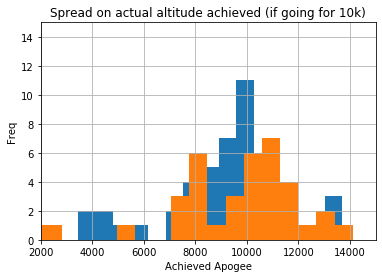

In [32]:
plt.figure()
plt.title('Spread on actual altitude achieved (if going for 10k)')
plt.grid()
plt.hist(filt2018["Actual Apogee (ft)"], bins=20);
plt.hist(filt2019["Actual Apogee (ft)"], bins=20);
plt.xlim(2000, 15000)
plt.ylim(0, 15)
plt.xlabel('Achieved Apogee')
plt.ylabel('Freq');

In [56]:
df2019 = df2019.sort_values(by='Total Score')

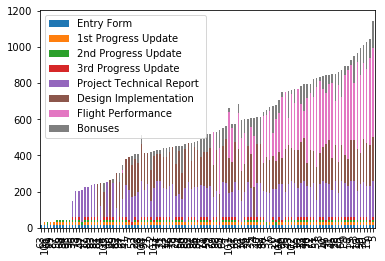

In [78]:
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
df2019[cols].plot.bar(stacked = True, ax=ax1)

In [81]:
fig.savefig('Score Spread.eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


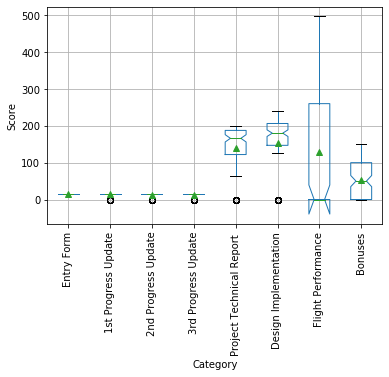

In [95]:

fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
df2019[cols].plot.box(stacked = True, ax=ax1, notch = True,showmeans = True)
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)
    plt.xlabel('Category')
    plt.ylabel('Score')
    plt.grid()

In [98]:
fig.savefig('Score Contributions.eps', bbox_inches='tight')
fig.savefig('Score Contributions.png', bbox_inches='tight')